In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import *
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("CompletionRates (2).csv") 
df.head()

,HIGH_DEG,INST_TYPE,INST_EXP_PS,AVG_FAC_SAL_PM,TS,TS_MEN,TS_WOM,TS_MAR,TS_DPEN,TS_VET,PER_PT,ST_FI_LO,ST_FI_M1,ST_FI_M2,ST_FI_H1,ST_FI_H2,HL_ED_P_MS,HL_ED_P_HS,HL_ED_P_PS,HECR
0,4,1,3212,4587,3903,0.4766,0.5234,0.056698,0.821877,0.018063,0.0699,0.504265,0.172604,0.136979,0.110386,0.075765,0.013812,0.359669,0.626519,0.3733
1,4,1,10418,6398,9562,0.4195,0.5805,0.149349,0.590745,0.039623,0.3095,0.490163,0.155722,0.144638,0.120532,0.088944,0.016633,0.388970,0.594397,0.3274
2,4,1,5784,5859,4165,0.4898,0.5102,0.221490,0.551088,0.048780,0.3160,0.440343,0.156229,0.154252,0.143705,0.105471,0.020833,0.358333,0.620833,0.3458
3,4,1,5824,6109,14245,0.4795,0.5205,0.065476,0.815247,0.024038,0.1046,0.331731,0.133242,0.156364,0.173993,0.204670,0.008762,0.312811,0.678428,0.5862
4,4,1,4622,6102,18520,0.5212,0.4788,0.061376,0.825645,0.025997,0.0821,0.272478,0.126271,0.150899,0.191947,0.258405,0.004407,0.240585,0.755008,0.6562


In [3]:
df.describe()

,HIGH_DEG,INST_TYPE,INST_EXP_PS,AVG_FAC_SAL_PM,TS,TS_MEN,TS_WOM,TS_MAR,TS_DPEN,TS_VET,PER_PT,ST_FI_LO,ST_FI_M1,ST_FI_M2,ST_FI_H1,ST_FI_H2,HL_ED_P_MS,HL_ED_P_HS,HL_ED_P_PS,HECR
count,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000
mean,3.776573,1.614266,7185.143217,6511.459231,7277.445804,0.436783,0.563217,0.128949,0.654349,0.025280,0.184851,0.372956,0.154180,0.157618,0.147346,0.167901,0.032476,0.357158,0.610366,0.509596
std,0.457522,0.686267,5912.441102,1878.892658,7880.028797,0.131714,0.131714,0.095156,0.201806,0.027741,0.147653,0.145285,0.030392,0.033569,0.055566,0.097650,0.025836,0.084495,0.098086,0.142362
min,2.000000,1.000000,2001.000000,656.000000,500.000000,0.000000,0.000000,0.004643,0.027608,0.001021,0.000000,0.088429,0.061331,0.022783,0.005574,0.001476,0.002097,0.098077,0.301518,0.300000
25%,4.000000,1.000000,4438.000000,5190.000000,1733.000000,0.380500,0.514900,0.053931,0.543298,0.008691,0.079775,0.262869,0.132091,0.141065,0.111736,0.095325,0.015027,0.302903,0.540202,0.398200
50%,4.000000,1.000000,5930.500000,6201.500000,4136.000000,0.429300,0.570700,0.101967,0.695728,0.017348,0.147400,0.344105,0.153516,0.158737,0.152804,0.157807,0.024783,0.361037,0.607723,0.487850
75%,4.000000,2.000000,8135.000000,7580.000000,9994.000000,0.485100,0.619500,0.182239,0.814881,0.029699,0.247800,0.456232,0.174115,0.177454,0.187453,0.233891,0.042162,0.417987,0.675926,0.595025
max,4.000000,3.000000,99578.000000,18089.000000,62050.000000,1.000000,1.000000,0.710611,0.965347,0.324054,0.973800,0.907579,0.301712,0.285425,0.292359,0.538512,0.292784,0.636364,0.896737,1.000000


In [4]:
#Using corelation to find the fearures that highly affect the results
cor = df.corr()
cor_target = abs(cor["HECR"])

#Selecting highly correlated features , minimum corelation vaue cor_bound
cor_bound=0.2
relevant_features = cor_target[cor_target>cor_bound]

#printing highly 
print(relevant_features)

INST_EXP_PS       0.470662
AVG_FAC_SAL_PM    0.440989
TS                0.272278
TS_MAR            0.298604
TS_DPEN           0.308455
TS_VET            0.209192
PER_PT            0.371340
ST_FI_LO          0.392670
ST_FI_M1          0.434503
ST_FI_H1          0.247662
ST_FI_H2          0.574688
HL_ED_P_MS        0.212293
HL_ED_P_HS        0.538126
HL_ED_P_PS        0.519480
HECR              1.000000
Name: HECR, dtype: float64


In [5]:
final_df= df[relevant_features.index]
final_df.head()

,INST_EXP_PS,AVG_FAC_SAL_PM,TS,TS_MAR,TS_DPEN,TS_VET,PER_PT,ST_FI_LO,ST_FI_M1,ST_FI_H1,ST_FI_H2,HL_ED_P_MS,HL_ED_P_HS,HL_ED_P_PS,HECR
0,3212,4587,3903,0.056698,0.821877,0.018063,0.0699,0.504265,0.172604,0.110386,0.075765,0.013812,0.359669,0.626519,0.3733
1,10418,6398,9562,0.149349,0.590745,0.039623,0.3095,0.490163,0.155722,0.120532,0.088944,0.016633,0.388970,0.594397,0.3274
2,5784,5859,4165,0.221490,0.551088,0.048780,0.3160,0.440343,0.156229,0.143705,0.105471,0.020833,0.358333,0.620833,0.3458
3,5824,6109,14245,0.065476,0.815247,0.024038,0.1046,0.331731,0.133242,0.173993,0.204670,0.008762,0.312811,0.678428,0.5862
4,4622,6102,18520,0.061376,0.825645,0.025997,0.0821,0.272478,0.126271,0.191947,0.258405,0.004407,0.240585,0.755008,0.6562


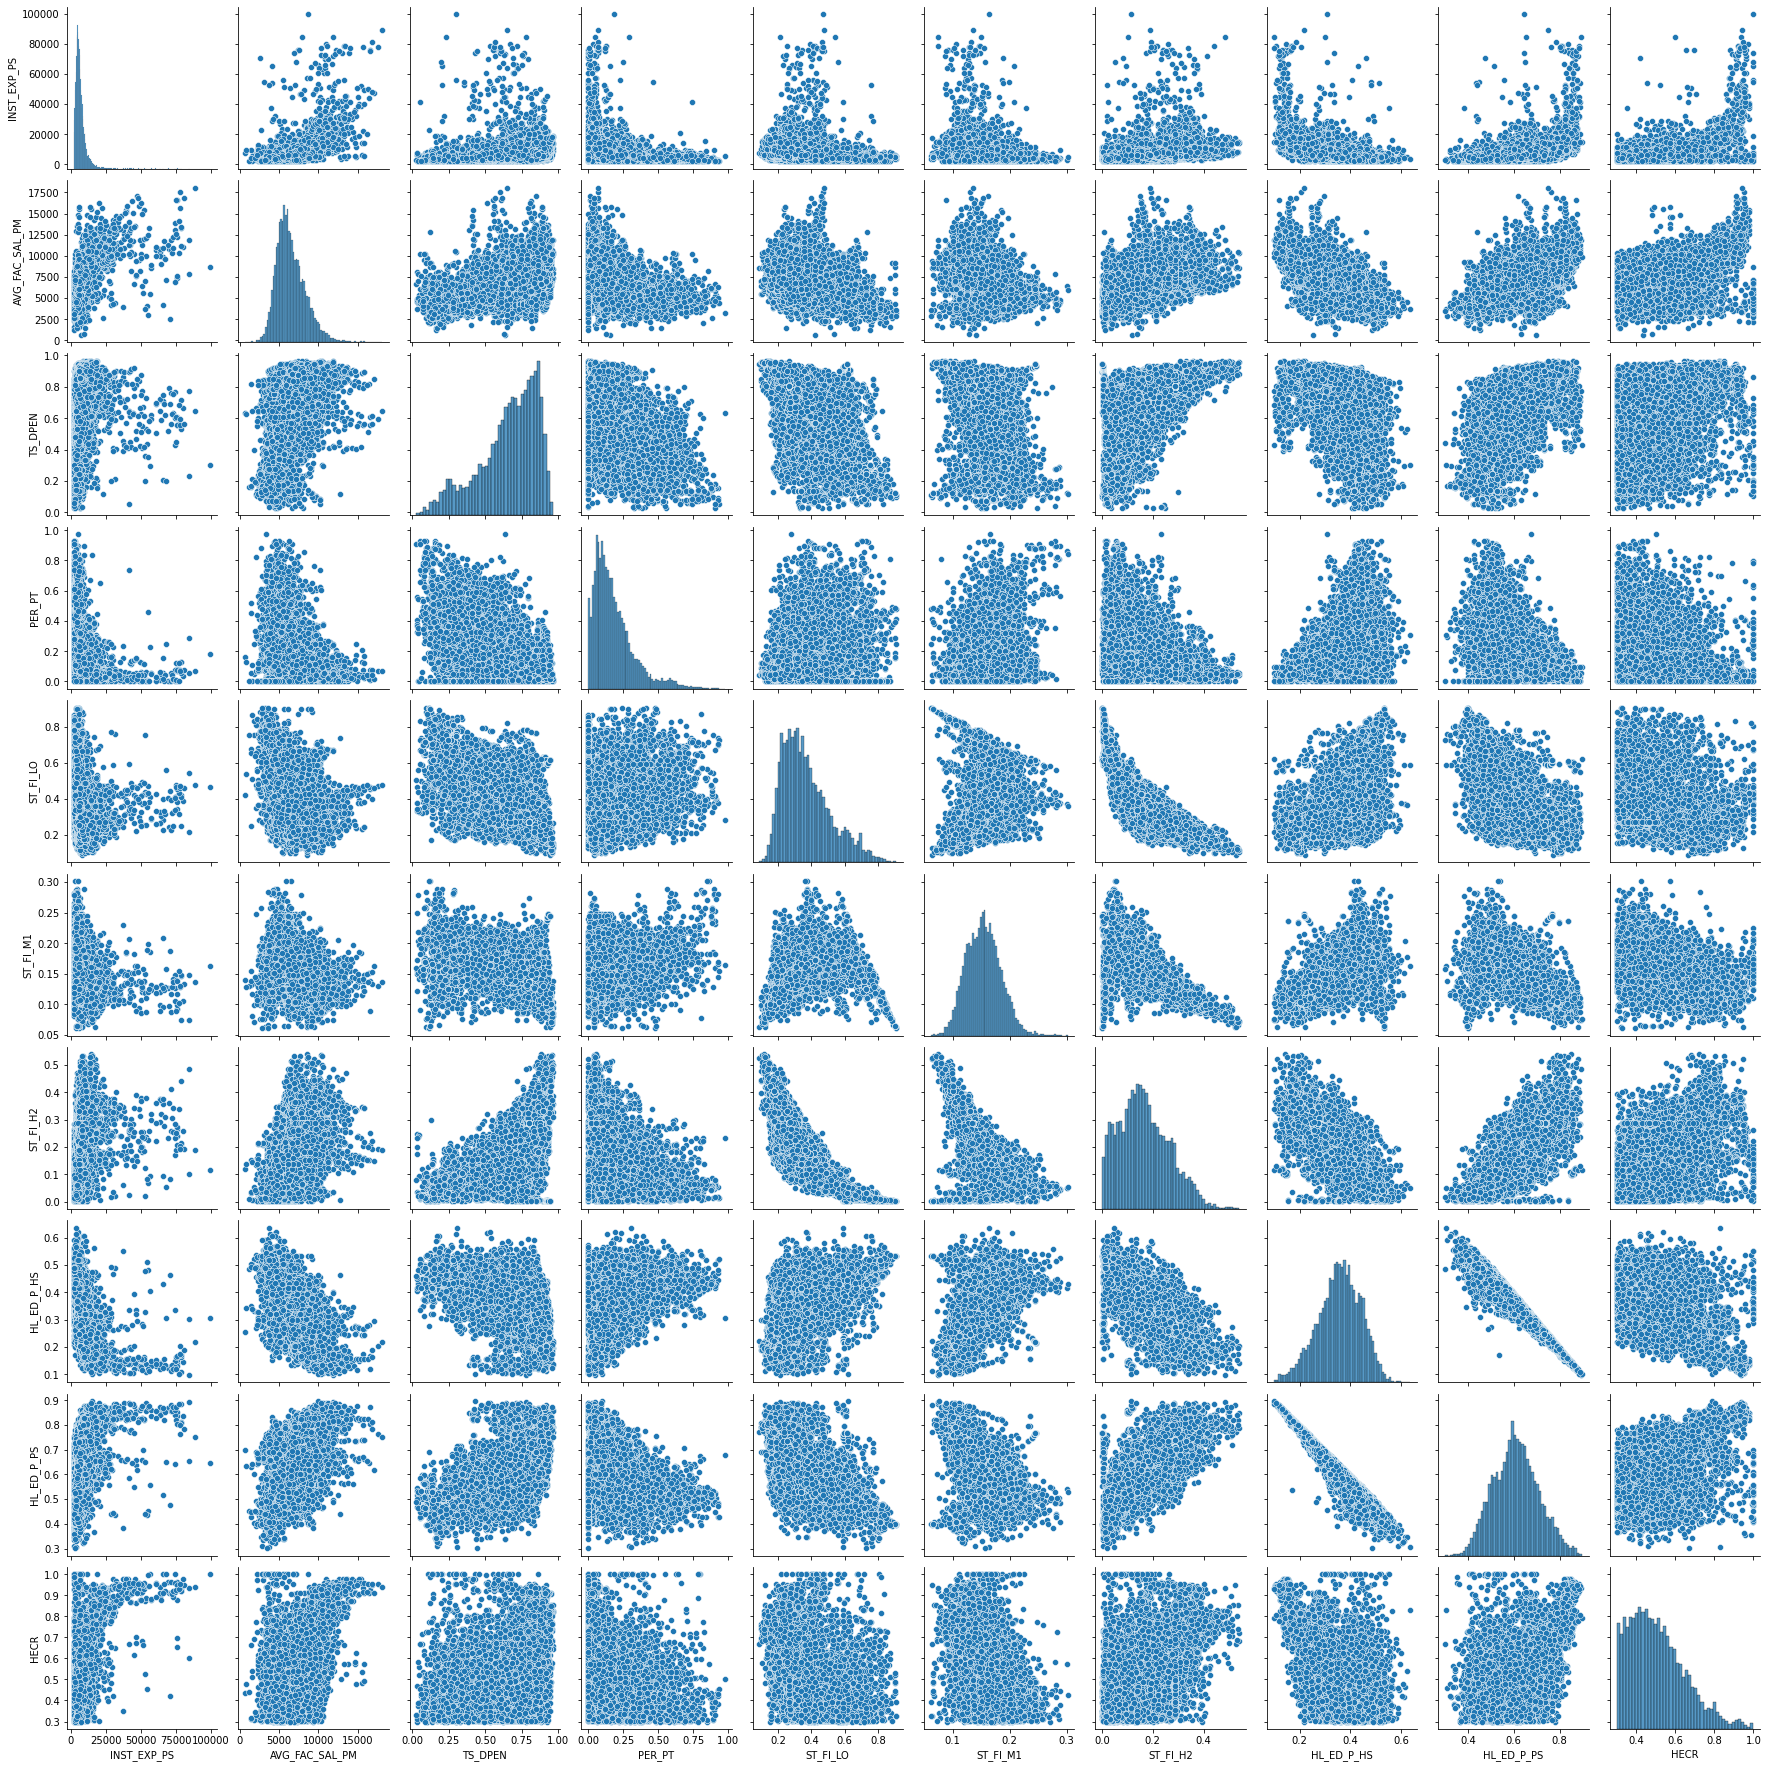

In [30]:
sns.pairplot(final_df)
plt.show()

In [6]:
# Dividing input and output
X=final_df.drop("HECR",1)
y=final_df["HECR"]

# Selecting test and traing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [44]:
#training linear regression model 1 with respective Hyperparameters
model1 = LinearRegression(fit_intercept=True, normalize=True)
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [45]:
#Testing the model 1
score=model1.score(X_test,y_test)
#printing score or accuracy
print("Accuracy ",round(score,3)*100)

Accuracy  49.5


In [46]:
# Training model 2 with adeuate Hyperparametor valuies
model2 = RandomForestRegressor(n_estimators=200,criterion="mse",max_features="auto",random_state=10)
  
# fit the regressor with x and y data
model2.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [47]:
#Testing the model 2
score2=model2.score(X_test,y_test)
#printing score or accuracy
print("Accuracy ",round(score2,3)*100)

Accuracy  72.0
